In [2]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import animation
import random
import pylab

In [3]:
beta_c = 0.5 * math.log(1+2**0.5)

In [4]:
#finding the correlations

def correlation(sample):
    avg = np.average(sample)
    n_array = sample.size-np.arange(sample.size)
    tmp = np.correlate(sample,sample,mode='full')
    result = tmp[tmp.size//2:]*1./n_array-avg**2
    vec = result/result[0]
    return(vec)

def IACT(sample,window):
    vec = correlation(sample)
    iact = 1+2*sum(vec[1:window])
    return(iact)


In [5]:
def error(samples,beta):
    error = beta * np.sqrt(np.var(samples/beta))
    return(error)

# Gibbs

In [31]:
#load the samples
samples_4 = np.load("samples_beta_c_4_sus.npy")
samples_8 = np.load("samples_beta_c_8_sus.npy")
samples_16 = np.load("samples_beta_c_16_sus.npy")
samples_32 = np.load("samples_beta_c_32_sus.npy")

In [39]:
#finding the sus
sus_4 = np.mean(samples_4)
sus_8 = np.mean(samples_8)
sus_16 = np.mean(samples_16)
sus_32 = np.mean(samples_32)

#finding the error
error_4 = error(samples_4,beta_c)
error_8 = error(samples_8,beta_c)
error_16 = error(samples_16,beta_c)
error_32 = error(samples_32,beta_c)

In [40]:
print('N=4, sus: ', sus_4,' error: ', error_4)
print('N=8, sus: ', sus_8,' error: ', error_8)
print('N=16, sus: ', sus_16,' error: ', error_16)
print('N=32, sus: ', sus_32,' error: ', error_32)

N=4, sus:  0.33369010576494346  error:  0.12998897903141773
N=8, sus:  0.2778261259206118  error:  0.11804734890286604
N=16, sus:  0.2037022147185223  error:  0.0795113477372602
N=32, sus:  0.17827364112173621  error:  0.09188552310928702


In [4]:
#find the correlation functions
corr_4 = correlation(samples_4)
corr_8 = correlation(samples_8)
corr_16 = correlation(samples_16)
corr_32 = correlation(samples_32)

In [5]:
#plots

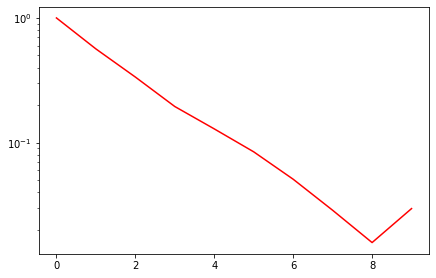

In [10]:
#4
n = 10

fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(corr_4[:n],color='red')
line, = ax.plot(np.zeros(n) ,color='black',label='y=0')
ax.set_yscale('log')


pylab.show()

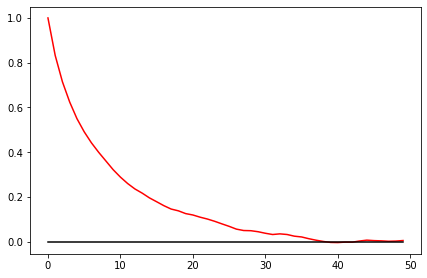

In [17]:
#8
n = 50

fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(corr_8[:n],color='red')
line, = ax.plot(np.zeros(n) ,color='black',label='y=0')
#ax.set_yscale('log')


pylab.show()

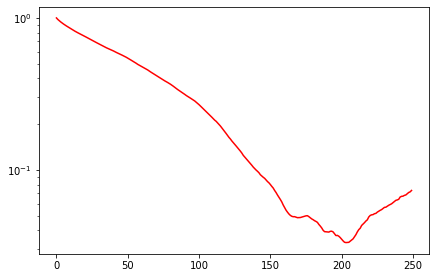

In [20]:
#16
n = 250

fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(corr_16[:n],color='red')
line, = ax.plot(np.zeros(n) ,color='black',label='y=0')
ax.set_yscale('log')


pylab.show()

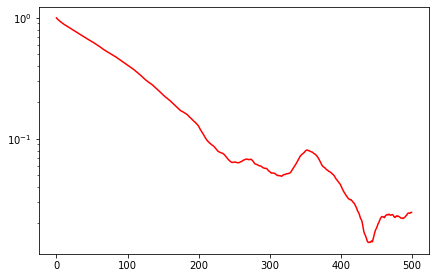

In [23]:
#32
n = 500

fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(corr_32[:n],color='red')
line, = ax.plot(np.zeros(n) ,color='black',label='y=0')
ax.set_yscale('log')


pylab.show()

In [24]:
# windows
window_4 = 8
window_8 = 38
window_16 = 200
window_32 = 430

In [25]:
#Give the IACT at the suggested windows

IACT_4 = IACT(samples_4,window_4)
IACT_8 = IACT(samples_8,window_8)
IACT_16 = IACT(samples_16,window_16)
IACT_32 = IACT(samples_32,window_32)

In [26]:
print('N=4 ', IACT_4)
print('N=8 ', IACT_8)
print('N=16 ', IACT_16)
print('N=32 ', IACT_32)

N=4  3.7725512982042133
N=8  16.316651309856944
N=16  133.09992313311065
N=32  207.96701873461325


# Hierarchical and two step

## N=4

In [12]:
#load the samples
step2 = np.load("samples_beta_c_4_2step.npy")
hierl2 = np.load("samples_beta_c_4_sus_hierl2.npy")

In [13]:
#finding the sus
sus_step2 = np.mean(step2)
sus_hierl2 = np.mean(hierl2)

#finding the error
error_step2 = error(step2,beta_c)
error_hierl2 = error(hierl2,beta_c)

In [14]:
print('2 step sus: ', sus_step2,' error: ', error_step2)
print('hierl2 sus: ', sus_hierl2,' error: ', error_hierl2)

2 step sus:  0.33806805362921716  error:  0.12799359428866558
hierl2 sus:  0.3306300868425101  error:  0.13266329565987028


In [15]:
#find the correlation functions
corr_step2 = correlation(step2)
corr_hierl2 = correlation(hierl2)

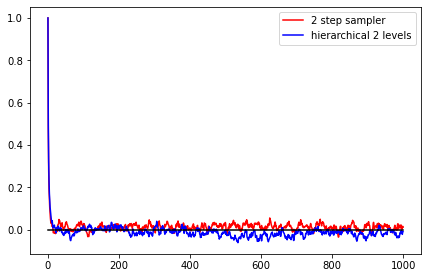

In [28]:
#4
n = 1000

fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(corr_step2[:n],color='red',label = '2 step sampler')
line, = ax.plot(corr_hierl2[:n],color='blue',label = 'hierarchical 2 levels')
line, = ax.plot(np.zeros(n) ,color='black')
#ax.set_yscale('log')
ax.legend()

pylab.show()

In [29]:
#suggetss both have a window of 14
# windows
window_step2 = 14
window_hierl2 = 14

In [30]:
#Iact

IACT_step2 = IACT(step2,window_step2)
IACT_hierl2 = IACT(hierl2,window_hierl2)

In [31]:
print('2 step ', IACT_step2)
print('hier l2 ', IACT_hierl2)

2 step  3.9423632544353424
hier l2  4.632049287824919


## N=8

In [32]:
#load the samples
step2 = np.load("samples_beta_c_8_2step.npy")
hierl2 = np.load("samples_beta_c_8_sus_hierl2.npy")
hierl3 = np.load("samples_beta_c_8_sus_hierl3.npy")

In [33]:
#finding the sus
sus_step2 = np.mean(step2)
sus_hierl2 = np.mean(hierl2)
sus_hierl3 = np.mean(hierl3)

#finding the error
error_step2 = error(step2,beta_c)
error_hierl2 = error(hierl2,beta_c)
error_hierl3 = error(hierl3,beta_c)

print('2 step sus: ', sus_step2,' error: ', error_step2)
print('hierl2 sus: ', sus_hierl2,' error: ', error_hierl2)
print('hierl3 sus: ', sus_hierl3,' error: ', error_hierl3)

2 step sus:  0.28694989183577246  error:  0.11372755760799846
hierl2 sus:  0.2790082338155459  error:  0.1193445768099659
hierl3 sus:  0.25801221936144514  error:  0.13960922130643888


In [34]:
#find the correlation functions
corr_step2 = correlation(step2)
corr_hierl2 = correlation(hierl2)
corr_hierl3 = correlation(hierl3)

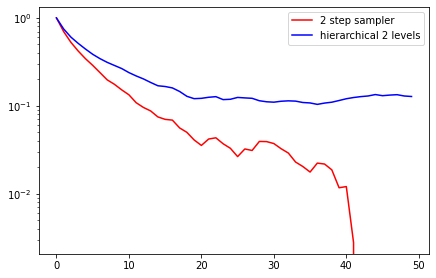

In [45]:
#4
n = 50

fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(corr_step2[:n],color='red',label = '2 step sampler')
line, = ax.plot(corr_hierl2[:n],color='blue',label = 'hierarchical 2 levels')
#line, = ax.plot(corr_hierl3[:n],color='green',label = 'hierarchical 3 levels')
line, = ax.plot(np.zeros(n) ,color='black')
ax.set_yscale('log')
ax.legend()

pylab.show()

In [36]:
#suggetss both have a window of 14
# windows
window_step2 = 4800
window_hierl2 = 40
window_hierl3 = 40

#Iact

IACT_step2 = IACT(step2,window_step2)
IACT_hierl2 = IACT(hierl2,window_hierl2)
IACT_hierl3 = IACT(hierl3,window_hierl3)

print('2 step ', IACT_step2)
print('hier l2 ', IACT_hierl2)
print('hier l3 ', IACT_hierl3)

2 step  7.939200609444791
hier l2  10.503798960375432
hier l3  16.6248686368622


## N=16

In [46]:
#load the samples
step2 = np.load("samples_beta_c_16_2step.npy")
hierl2 = np.load("samples_beta_c_16_sus_hierl2.npy")

In [47]:
#finding the sus
sus_step2 = np.mean(step2)
sus_hierl2 = np.mean(hierl2)

#finding the error
error_step2 = error(step2,beta_c)
error_hierl2 = error(hierl2,beta_c)

print('2 step sus: ', sus_step2,' error: ', error_step2)
print('hierl2 sus: ', sus_hierl2,' error: ', error_hierl2)

2 step sus:  0.021606776117242075  error:  0.07551442081948785
hierl2 sus:  0.0036348564350979088  error:  0.028267504401176233


In [48]:
#find the correlation functions
corr_step2 = correlation(step2)
corr_hierl2 = correlation(hierl2)

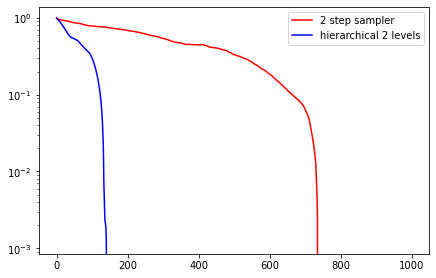

In [54]:
#4
n = 1000

fig = plt.figure(figsize=(7, 10))
ax = fig.add_subplot(2, 1, 1)

line, = ax.plot(corr_step2[:n],color='red',label = '2 step sampler')
line, = ax.plot(corr_hierl2[:n],color='blue',label = 'hierarchical 2 levels')
line, = ax.plot(np.zeros(n) ,color='black')
ax.set_yscale('log')
ax.legend()

pylab.show()

In [55]:
#suggetss both have a window of 14
# windows
window_step2 = 750
window_hierl2 = 180

#Iact

IACT_step2 = IACT(step2,window_step2)
IACT_hierl2 = IACT(hierl2,window_hierl2)

print('2 step ', IACT_step2)
print('hier l2 ', IACT_hierl2)

2 step  699.803025046545
hier l2  124.13438637829447
